# WeatherPy
----

### Analysis
* The temperature of cities located North of the equator experience lower temperatures compared to cities located South of the equator. In addition, the futher away North the city is from the equator, the lower the temperature is. 
* Based on this information, there appears to be no correlation with the city's cloudiness factor and its' latitude. There also appears to be no correlation with the wind speed a city expereinces and the latitude of the city. 
* There appears to be no correlation with a city's humidity and its' latitude. However, most cities appear to experience 50% or more humidity.

---


In [4]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import json

#import API key
from api_keys import api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (CSV)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls

In [6]:
#create an empty list
city_weather = []

#create a counter and set it to 0 to number each city 
counter = 0

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#create print statements before retrieving city name
print("Beginning Data Retrieval")
print("---------------------------------")

#create a for statement
for city in cities:
    
    #set parameters to create a specific url
    params = {"appid": api_key,
              "units": "imperial",
              "q": city
             }
    
    #create exact url with parameters and get it in JSON format
    city_response = requests.get(url, params=params)
    city_json = city_response.json()
    
    #use this statement to view in pretty print JSON format
    #commented out after extracting information in the try & except section:
    
    #print(json.dumps(city_json, indent=4, sort_keys=True))  
    
    #create a timer so the api key does not get locked out. Stop the code for 1 second in between
    time.sleep(1)

    #set counter to +1 to increase the number by 1 for each city
    counter += 1
    
    #create a print statement of each city as it is being processed
    print(f"Processing record {counter}|{city}")
    
    #create a try and except to skip through errors
    try:
        city_name = city_json["name"]
        city_clouds = city_json["clouds"]["all"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
        city_humidity = city_json["main"]["humidity"]
        city_latitude = city_json["coord"]["lat"]
        city_longitude = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_wind_speed = city_json["wind"]["speed"]
        
        #create a list of dictionaries and append weather data for each city into empty city_weather list 
        city_weather.append({"City": city_name,
                            "Cloudiness": city_clouds, 
                            "Country": city_country,
                            "Date": city_date,
                            "Humidity": city_humidity,
                            "Lat": city_latitude,
                            "Lng": city_longitude,
                            "Max Temp": city_max_temp,
                            "Wind Speed": city_wind_speed
                            })  
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

#create print statememnt after retrieving all city names 
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing record 1|georgetown
Processing record 2|robe
Processing record 3|faanui
Processing record 4|karaul
City not found. Skipping...
Processing record 5|hermanus
Processing record 6|punta arenas
Processing record 7|tanout
Processing record 8|nouadhibou
Processing record 9|albany
Processing record 10|guerrero negro
Processing record 11|bluff
Processing record 12|sataua
City not found. Skipping...
Processing record 13|port alfred
Processing record 14|busselton
Processing record 15|new norfolk
Processing record 16|borogontsy
Processing record 17|vestmanna
Processing record 18|butaritari
Processing record 19|pangody
Processing record 20|east london
Processing record 21|umarkot
Processing record 22|blagoyevo
Processing record 23|tautira
Processing record 24|kastamonu
Processing record 25|ushuaia
Processing record 26|louis trichardt
Processing record 27|hunchun
Processing record 28|mataura
Processing record 29|tasiilaq
Processin

Processing record 242|tungkang
City not found. Skipping...
Processing record 243|batemans bay
Processing record 244|saint-philippe
Processing record 245|puerto madero
Processing record 246|victoria
Processing record 247|diamantina
Processing record 248|umzimvubu
City not found. Skipping...
Processing record 249|gisborne
Processing record 250|pacific grove
Processing record 251|bredasdorp
Processing record 252|annau
Processing record 253|bako
Processing record 254|atikokan
Processing record 255|agadez
Processing record 256|airai
Processing record 257|portland
Processing record 258|puerto escondido
Processing record 259|boa vista
Processing record 260|luderitz
Processing record 261|sorland
Processing record 262|morro bay
Processing record 263|avera
Processing record 264|alugan
Processing record 265|albacete
Processing record 266|abonnema
Processing record 267|venado tuerto
Processing record 268|xuddur
Processing record 269|anadyr
Processing record 270|grindavik
Processing record 271|karl

Processing record 474|cumaribo
City not found. Skipping...
Processing record 475|ixtapa
Processing record 476|suntar
Processing record 477|sayyan
Processing record 478|aklavik
Processing record 479|dharchula
Processing record 480|aberdeen
Processing record 481|concepcion
Processing record 482|vanavara
Processing record 483|andenes
City not found. Skipping...
Processing record 484|thiruvananthapuram
Processing record 485|manosque
Processing record 486|golden
Processing record 487|zyryanka
Processing record 488|tubuala
Processing record 489|callaway
Processing record 490|caravelas
Processing record 491|pochutla
Processing record 492|kichera
Processing record 493|nanchang
Processing record 494|lagoa
Processing record 495|rota
Processing record 496|tonj
City not found. Skipping...
Processing record 497|talcahuano
Processing record 498|georgiyevka
Processing record 499|boddam
Processing record 500|foumban
Processing record 501|dinar
Processing record 502|loiza
Processing record 503|morondav

In [7]:
#create dataframe and count the number of cities in dataset
city_weather_df = pd.DataFrame(city_weather)

city_weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [8]:
#show dataframe from the raw information from the API 

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Georgetown,40,GY,1553634000,70,6.80,-58.16,84.20,6.93
1,Robe,12,ET,1553637942,84,7.12,40.01,51.24,3.15
2,Faanui,32,PF,1553637943,100,-16.48,-151.75,83.46,8.08
3,Hermanus,80,ZA,1553637661,78,-34.42,19.24,69.01,13.00
4,Punta Arenas,75,CL,1553637747,71,-53.16,-70.91,53.60,13.87


#### Latitude vs. Temperature Plot

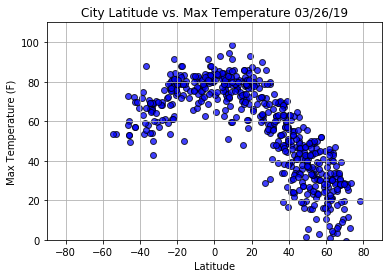

In [13]:
#create a latitude vs. temperature scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Max Temp"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Max Temperature 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save figure
plt.savefig("Images/latVStemp.png")

#### Latitude vs. Humidity Plot

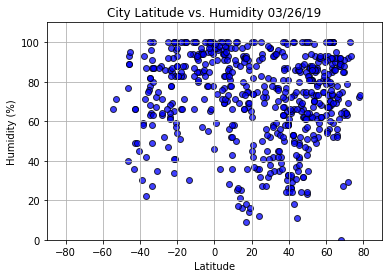

In [10]:
#create a latitude vs. humidity scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Humidity"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Humidity 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save figure
plt.savefig("Images/latVShumidity.png")

#### Latitude vs. Cloudiness Plot

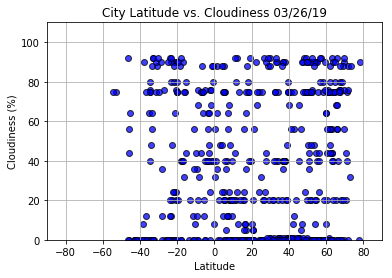

In [11]:
#create a latitude vs. cloudiness scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Cloudiness"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 110)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Cloudiness 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save figure
plt.savefig("Images/latVScloudiness.png")

#### Latitude vs. Wind Speed Plot

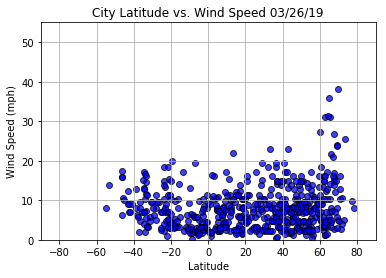

In [12]:
#create a latitude vs. wind speed scatter plot

#x-axis
x_axis = city_weather_df["Lat"]

#y-axis
y_axis = city_weather_df["Wind Speed"]

#create scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

#set x-limit
plt.xlim (-90,90)

#set y-limit
plt.ylim(0, 55)

#set a grid
plt.grid()

#label the plot
plt.title("City Latitude vs. Wind Speed 03/26/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save figure
plt.savefig("Images/latVSwindspeed.png")